In [3]:
%matplotlib inline
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *
plt.style.use('ggplot')

# Code4Lib 2017 Workshop Part 2

## Merging Data

In many real world situations, the data we'd like to analyze comes in multiple files. Pandas provides multiple different ways of combining data, including "merge()", and "concat()". To get started, we first need to load some datasets into DataFrames. We'll use the same surveys data as in the last part of the workshop, as well as another dataset called "surveys2.csv", which contains 99 additional data points with the same structure as the original "surveys.csv".

In [4]:
# load the csvs into DataFrames
survey_dataframe = pd.read_csv("data/surveys.csv")
survey2_dataframe = pd.read_csv("data/surveys2.csv")

# print out the dimensions of each DataFrame
print("""
Survey1: %s
Survey2: %s
""" % (survey_dataframe.shape, survey2_dataframe.shape))


Survey1: (35549, 9)
Survey2: (99, 9)



### Concatenation
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

First, we'll look at concatenating two DataFrames. Often, data is separated over multiple files for many reasons including logical separation (time-based, etc), or due to size constraints, so it is useful to know how to concatenate multiple sets of data.

Pandas provides the "pd.concat()" method, which accepts a sequence (example: a tuple, list, dict) of Series or DataFrame objects to concatenate together. We'll pass a list containing the survey_dataframe and the survey2_dataframe to create a new DataFrame "big_survey_dataframe":

In [5]:
big_survey_dataframe = pd.concat([survey_dataframe, survey2_dataframe])
big_survey_dataframe.shape 

(35648, 9)

In [6]:
big_survey_dataframe.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


### Merge
(http://pandas.pydata.org/pandas-docs/stable/merging.html)

Merging in Pandas is when you combine two different DataFrames that share a common identifier into a single DataFrame. This can be compared to the idea of joins in SQL. When you have two different DataFrames containing a shared identifier (think foreign key), you can use the "pd.merge()" function to merge them into a single DataFrame. There are several different ways you can merge the data, favoring different aspects of each dataset when deciding how to combine the data. We'll look at the two most popular and then provide a link with more information about additional types of merges.

We'll first load another dataset from "species.csv", containing information which expands on the species_id in our survey dataset.

In [7]:
species_dataframe = pd.read_csv("data/species.csv")
species_dataframe.head(10)

,species_id,genus,species,taxa
0,AB,Amphispiza,bilineata,Bird
1,AH,Ammospermophilus,harrisi,Rodent
2,AS,Ammodramus,savannarum,Bird
3,BA,Baiomys,taylori,Rodent
4,CB,Campylorhynchus,brunneicapillus,Bird
5,CM,Calamospiza,melanocorys,Bird
6,CQ,Callipepla,squamata,Bird
7,CS,Crotalus,scutalatus,Reptile
8,CT,Cnemidophorus,tigris,Reptile
9,CU,Cnemidophorus,uniparens,Reptile


#### Inner join merge

The first type of merge we'll look at is an inner join merge, and is the default type of merge in Pandas. As mentioned earlier, the two datasets to be merged need to have a common identifier in order to facilitate the merge. In the "surveys" and "species" datasets, this identifier is "species_id". The merge will connect the two datasets by this identifier, so we'll end up with one dataset containing both observation information, as well as augmented information about each specific species.

The idea of an inner join merge is that, for each row of data, the identifier that we are joining on (species_id) must exist in both datasets in order for the join to happen for that row. For example, if in our first row of data in "surveys", we have a species_id of "AX", but that species ID does not appear anywhere in the "species" dataset, that row will not be included in the final merged table.

The concept of an inner join is illustrated by the following Venn diagram:
<br><br><br>
<img src="http://bit.ly/2moPiCU"/>
<br><br><br>
To do an inner join merge in Pandas, use the "pd.merge()" method, and pass the following arguments:


| Argument Name | Description |
|----------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| left     | the first DataFrame to merge, in our case will be the "survey" DataFrame      |                           
| right    | the second DataFrame to merge, in our case will be the "species" DataFrame                                                                       |
| left_on  | the identifier from the first DataFrame to use to merge -- ours will be "species_id"                                                                  |
| right_on | the identifier from the second DataFrame to use to merge -- ours will have the same name as the identifier in the first DataFrame, "species_id", but sometimes the column name could be different in each dataset |

<br>

We'll do a inner join merge, and look at the resulting DataFrame as well as the resulting size as compared to the size of the original DataFrames.

In [8]:
merged_survey_dataframe = pd.merge(left=big_survey_dataframe, right=species_dataframe, left_on='species_id', right_on='species_id')
merged_survey_dataframe.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,22,7,17,1977,15,NL,F,31.0,NaN,Neotoma,albigula,Rodent
3,38,7,17,1977,17,NL,M,33.0,NaN,Neotoma,albigula,Rodent
4,72,8,19,1977,2,NL,M,31.0,NaN,Neotoma,albigula,Rodent


In [9]:
# show the shape of each DataFrame involved in the merge and the resulting DataFrame
print("""
big_survey_dataframe:    %s
species_dataframe:       %s
merged_survey_dataframe: %s
""" % (big_survey_dataframe.shape, species_dataframe.shape, merged_survey_dataframe.shape))


big_survey_dataframe:    (35648, 9)
species_dataframe:       (54, 4)
merged_survey_dataframe: (34885, 12)



#### Left join merge

Recall that in an inner join merge, the identifier that joins the datasets must appear in both datasets in order to be in the resulting merged dataset.

In a left join merge, this is not true, and the data in the first (or left) dataset will be favored. For each row in the first dataset, if the identifier doesn't appear in the second dataset, the row will still be included in the merged set, but the data will all be "NaN" (or null) for all columns that originally appeared in the second dataset. 

Specifically, in terms of our data, if the species_id was "AX" in the first dataset, and that didn't appear anywhere in the second dataset, the resulting merged row would contain "NaN" (or null) values for "genus", "species", and "taxa", since that information wasn't available. Contrast this to an inner join, where that row would never be included in the final merged DataFrame.

The concept of a left join is illustrated by this Venn diagram:
<br><br><br>
<img src="http://bit.ly/2lzkBvq"/>
<br><br><br>
Doing a left join merge in Pandas is almost the same as the inner join, except an additional argument called "how", specifying how to do the merge, must be passed into the "pd.merge()" method. In this case the value for that argument would be "left".

We'll do a left join merge, and look at the resulting DataFrame as well as the resulting size as compared to the size of the original DataFrames.

In [10]:
left_merged_survey = pd.merge(left=big_survey_dataframe,
                              right=species_dataframe,
                              how='left',
                              left_on='species_id',
                              right_on='species_id')
left_merged_survey.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,1,7,16,1977,2,NL,M,32.0,NaN,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NL,M,33.0,NaN,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,37.0,NaN,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,36.0,NaN,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,35.0,NaN,Dipodomys,merriami,Rodent
5,6,7,16,1977,1,PF,M,14.0,NaN,Perognathus,flavus,Rodent
6,7,7,16,1977,2,PE,F,NaN,NaN,Peromyscus,eremicus,Rodent
7,8,7,16,1977,1,DM,M,37.0,NaN,Dipodomys,merriami,Rodent
8,9,7,16,1977,1,DM,F,34.0,NaN,Dipodomys,merriami,Rodent
9,10,7,16,1977,6,PF,F,20.0,NaN,Perognathus,flavus,Rodent


In [11]:
# show the shape of each DataFrame involved in the merge and the resulting DataFrame
print("""
big_survey_dataframe:    %s
species_dataframe:       %s
left_merged_survey:      %s
""" % (big_survey_dataframe.shape, species_dataframe.shape, left_merged_survey.shape))


big_survey_dataframe:    (35648, 9)
species_dataframe:       (54, 4)
left_merged_survey:      (35648, 12)



## Cleaning Data

We know that data comes to us in all shapes, sizes, formats, and with varying quality. Cleaning data is a common task in data analysis, and Pandas provides us with several nice methods that make doing that easier. We'll explore a couple useful/interesting examples in this section.

### Removing duplicate entries
(http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.drop_duplicates.html)

Sometimes you'll run into the situation where you need to remove duplicate rows from a dataset. Pandas provides a convenience method for doing this on the DataFrame class called "drop_duplicates()". By default, this method will consider a row where all column values are the same to be a duplicate row. This may not always be the case though, and you may want to only consider a row a duplicate if only a subset of the column values are the same (or maybe only one). You can pass in an argument called "subset" in this case, and provide the column name(s) that you'd like to be considered in defining a duplicate. 

In our "left_merged_survey" DataFrame from the last section, there are duplicate values. We can verify this by calling the "duplicated()" method on "left_merged_survey", which returns a Series that will have a True or False value for each row, depending on if it is a duplicate or not. By using the "value_counts()" method on that result, we can see how many rows are duplicates:


In [12]:
left_merged_survey.duplicated().value_counts()

False    35549
True        99
dtype: int64

We see that there are some rows that have a value of True, which means they are duplicates. We'll call the "drop_duplicates()" with no arguments to remove these, and we should be left with a DataFrame that has the same number of rows that were False (not duplicates) above:

In [13]:
no_duplicates_survey = left_merged_survey.drop_duplicates()
no_duplicates_survey.shape

(35549, 12)

### Removing NaN (null) entries
(http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.dropna.html)

In certain cases, you may want to remove rows from a dataset that contain null values. Pandas provides a method on DataFrames called "dropna()" whose default behavior is to drop the rows that have any NaN/null values. We'll call this on our "no_duplicates_survey" DataFrame. Notice how many rows were dropped - we had a lot of null values in this dataset:

In [14]:
no_nan_survey = no_duplicates_survey.dropna()
no_nan_survey.shape

(30676, 12)

## Sorting/Grouping Data

In this section we'll look at different ways you can sort and group data in Pandas.

### Sort
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Pandas provides a method called "sort_values()", which allows you to sort on either axis, and in ascending or descending order. By default, sort_values() will sort in ascending order. The only required argument is the value(s) you wish to sort by, which can be passed as either a string, or a list of strings. If you pass a list of strings, the DataFrame will be sorted by each value in the order they are specified in the list.

In our example, we sort our survey data in ascending order first by sex, then species, then weight, then hindfoot_length:

In [15]:
sort_asc = no_nan_survey.sort_values(['sex','species','weight','hindfoot_length'])
sort_asc.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
14550,14551,6,11,1988,21,NL,F,32.0,32.0,Neotoma,albigula,Rodent
5965,5966,5,22,1982,2,NL,F,32.0,40.0,Neotoma,albigula,Rodent
7648,7649,4,16,1983,17,NL,F,28.0,44.0,Neotoma,albigula,Rodent
9359,9360,7,4,1984,15,NL,F,28.0,50.0,Neotoma,albigula,Rodent
4394,4395,5,3,1981,18,NL,F,32.0,56.0,Neotoma,albigula,Rodent
16108,16109,6,3,1989,12,NL,F,29.0,57.0,Neotoma,albigula,Rodent
14383,14384,4,18,1988,8,NL,F,30.0,60.0,Neotoma,albigula,Rodent
12702,12703,4,26,1987,1,NL,F,30.0,63.0,Neotoma,albigula,Rodent
25790,25791,5,10,1997,12,NL,F,30.0,63.0,Neotoma,albigula,Rodent
25765,25766,5,10,1997,12,NL,F,30.0,64.0,Neotoma,albigula,Rodent


To sort in descending order, set the value of the "ascending" argument to False. This time we are sorting the same data by weight, then hindfoot_length:

In [16]:
sort_desc = no_nan_survey.sort_values(['weight','hindfoot_length'], ascending = False)
sort_desc.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
33048,33049,11,17,2001,12,NL,M,33.0,280.0,Neotoma,albigula,Rodent
12870,12871,5,28,1987,2,NL,M,32.0,278.0,Neotoma,albigula,Rodent
15458,15459,1,11,1989,9,NL,M,36.0,275.0,Neotoma,albigula,Rodent
2132,2133,10,25,1979,2,NL,F,33.0,274.0,Neotoma,albigula,Rodent
12728,12729,4,26,1987,2,NL,M,32.0,270.0,Neotoma,albigula,Rodent
30174,30175,1,8,2000,2,NL,M,34.0,265.0,Neotoma,albigula,Rodent
12601,12602,4,6,1987,2,NL,M,34.0,260.0,Neotoma,albigula,Rodent
13024,13025,7,1,1987,2,NL,M,33.0,260.0,Neotoma,albigula,Rodent
8868,8869,2,5,1984,15,NL,M,33.0,259.0,Neotoma,albigula,Rodent
12457,12458,3,2,1987,2,NL,M,33.0,259.0,Neotoma,albigula,Rodent


### Group By
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

Often when exploring or analyzing data, you'll want to group the data by a specific variable. In this case, one interesting way to group data would be by sex. Pandas provides a method on DataFrame called "groupby()", which will do that for you. In the following example, we group by sex, and get a count of all entries that are male vs female in the data. We'll see more interesting uses of "groupby()" later on.

In [17]:
group_by_sex = sort_asc.groupby('sex')
group_by_sex.size()

sex
F    14584
M    16092
dtype: int64

## Transforming Data

In this section, we'll look at how you can transform data in Pandas. Specifically, we'll look at how to run rows or columns through functions to transform values, and we'll look at how to convert data into Pandas' DateTime format.

### Apply
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)

Pandas allows us to run a function over each row to clean a string, or in the case of our example, apply a conversion formula to each value. We can use apply() to process specific rows or columns.

In [18]:
# For example, you can process every value in a column through a function:
    
def convert_grams_to_oz(w):
    return w / 28.34952
    
no_nan_survey['weight'].apply(convert_grams_to_oz).head(10)

62    1.410959
63    1.693150
64    1.022945
65    1.622602
66    1.269863
67    1.834246
68    0.282192
69    0.776027
70    1.234589
73    0.246918
Name: weight, dtype: float64

### DateTime
(http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

Pandas provides a DateTime datatype, which allows for more advanced filtering/sorting on dates, plus additional capabilities in terms of visualizing and working with time-series data.

If you have date information as a string/int/float within your dataset (even spread out across multiple fields), it is easy in Pandas to convert it into DateTime format using the "pd.to_datetime()" function.

Try running the following function to convert the year/month/day string fields into a Pandas DateTime formatted field, and note the error at the bottom of the stack trace:

In [19]:
datetimes = pd.to_datetime(
    { 'year': no_nan_survey.year,
      'month': no_nan_survey.month,
      'day': no_nan_survey.day
    })

ValueError: cannot assemble the datetimes: day is out of range for month

Judging by the error above, we can reasonably suspect that there is an error with some of the date values. Specifically, there are some instances where the "day" value is out of range for its corresponding month. For example, it may be that there is a February 30th date included, which has never been a real occuring date.

By default, the pd.to_datetime() method will be strict about validating the dates before converting to DateTime. If you want it to ignore any date errors, you can pass the argument 'errors' with the value 'coerce' into the method. This will set any dates with inconsistencies to "NaT", which is the null value for DateTime fields (similar to NaN which we've seen before).

After running the pd.to_datetime() function, which returns a Series with the new values, we'll append that as a column to our existing DataFrame and save the results in a new DataFrame.

In [20]:
# coerce to ignore incorrect dates
datetimes = pd.to_datetime(
    { 'year': no_nan_survey.year,
      'month': no_nan_survey.month,
      'day': no_nan_survey.day
    },
    errors='coerce')

dates_survey = no_nan_survey.assign(date = datetimes)
dates_survey.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,date
62,63,8,19,1977,3,DM,M,35.0,40.0,Dipodomys,merriami,Rodent,1977-08-19
63,64,8,19,1977,7,DM,M,37.0,48.0,Dipodomys,merriami,Rodent,1977-08-19
64,65,8,19,1977,4,DM,F,34.0,29.0,Dipodomys,merriami,Rodent,1977-08-19
65,66,8,19,1977,4,DM,F,35.0,46.0,Dipodomys,merriami,Rodent,1977-08-19
66,67,8,19,1977,7,DM,M,35.0,36.0,Dipodomys,merriami,Rodent,1977-08-19
67,68,8,19,1977,8,DO,F,32.0,52.0,Dipodomys,ordii,Rodent,1977-08-19
68,69,8,19,1977,2,PF,M,15.0,8.0,Perognathus,flavus,Rodent,1977-08-19
69,70,8,19,1977,3,OX,F,21.0,22.0,Onychomys,sp.,Rodent,1977-08-19
70,71,8,19,1977,7,DM,F,36.0,35.0,Dipodomys,merriami,Rodent,1977-08-19
73,74,8,19,1977,8,PF,M,12.0,7.0,Perognathus,flavus,Rodent,1977-08-19


That worked! You can see the new "date" field on the far right side of the resulting DataFrame. But what was wrong with our original data? We can find out by using pd.is_null() to find out which "date" entries are null, and then looking at the original "month", "day", and "year" columns.

In [21]:
# see which dates were incorrect
dates_survey[(pd.isnull(dates_survey['date']))]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,date
30649,30650,4,31,2000,6,PP,F,22.0,19.0,Chaetodipus,penicillatus,Rodent,NaT
30650,30651,4,31,2000,6,PB,M,25.0,32.0,Chaetodipus,baileyi,Rodent,NaT
30651,30652,4,31,2000,6,PB,F,25.0,30.0,Chaetodipus,baileyi,Rodent,NaT
30652,30653,4,31,2000,6,PP,M,23.0,20.0,Chaetodipus,penicillatus,Rodent,NaT
30653,30654,4,31,2000,6,PP,M,23.0,24.0,Chaetodipus,penicillatus,Rodent,NaT
30654,30655,4,31,2000,6,OT,M,20.0,33.0,Onychomys,torridus,Rodent,NaT
30655,30656,4,31,2000,6,PP,F,24.0,17.0,Chaetodipus,penicillatus,Rodent,NaT
30656,30657,4,31,2000,6,PB,M,24.0,29.0,Chaetodipus,baileyi,Rodent,NaT
30657,30658,4,31,2000,6,PB,F,25.0,36.0,Chaetodipus,baileyi,Rodent,NaT
30658,30659,4,31,2000,9,OT,F,20.0,24.0,Onychomys,torridus,Rodent,NaT


As you can see, there were some entries that have dates of April 31, and September 31, both months which have only 30 days.

## Querying by DateTime

Now that we have our dates in a Pandas DateTime format, we can more easily query by date, and date ranges. The following example shows how we can filter the DataFrame to show only dates within a certain time period in a simple way. As you might expect, this becomes even more powerful and convenient with time data in addition to date.

In [22]:
dates_survey[(dates_survey['date'] > '1987-07-01') & (dates_survey['date'] < '1988-06-30')]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,date
13178,13179,7,26,1987,3,PP,M,22.0,11.0,Chaetodipus,penicillatus,Rodent,1987-07-26
13191,13192,8,25,1987,21,RM,F,14.0,10.0,Reithrodontomys,megalotis,Rodent,1987-08-25
13192,13193,8,25,1987,20,DM,F,34.0,34.0,Dipodomys,merriami,Rodent,1987-08-25
13193,13194,8,25,1987,12,OL,F,20.0,26.0,Onychomys,leucogaster,Rodent,1987-08-25
13194,13195,8,25,1987,6,DO,M,37.0,48.0,Dipodomys,ordii,Rodent,1987-08-25
13195,13196,8,25,1987,12,PP,F,22.0,18.0,Chaetodipus,penicillatus,Rodent,1987-08-25
13198,13199,8,25,1987,14,DM,F,37.0,49.0,Dipodomys,merriami,Rodent,1987-08-25
13200,13201,8,25,1987,16,PE,M,22.0,23.0,Peromyscus,eremicus,Rodent,1987-08-25
13201,13202,8,25,1987,22,DM,M,37.0,38.0,Dipodomys,merriami,Rodent,1987-08-25
13202,13203,8,25,1987,22,DM,M,36.0,46.0,Dipodomys,merriami,Rodent,1987-08-25


Pandas provides much more functionality in dealing with time-series data. If you are interested in diving further in, check out the Pandas documentation around this topic: http://pandas.pydata.org/pandas-docs/stable/timeseries.html

## Visualization

The final step in analyzing data is typically visualization, and this helps us communicate the meaning of the data or the trends found within the data to a broader audience. Pandas provides built-in methods to do visualization, but the Pandas API is still being standardized, so many types of visualizations are more easily created using other libraries. We will explore some examples using Pandas, and some examples using a different visualization library in Python called "ggplot". This exemplifies the strength of the compatibility of Pandas' data structures with other Python libraries.

#### Pandas Visualization Documentation
* http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

#### ggplot Visualization Documentation
* http://ggplot.yhathq.com/docs/index.html

### Histograms
(https://en.wikipedia.org/wiki/Histogram)
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html)

A histogram is a diagram that shows a history presentation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable).

We'll create a histogram in Pandas with our species/survey data to see the distribution of weight over the various species types. To create a histogram, use the ".plot.hist()" method. In our example, we pass an additional argument "orientation" that will control the horizontal/vertical orientation of the resulting graph.

species
albigula        Axes(0.125,0.125;0.775x0.755)
baileyi         Axes(0.125,0.125;0.775x0.755)
eremicus        Axes(0.125,0.125;0.775x0.755)
flavus          Axes(0.125,0.125;0.775x0.755)
fulvescens      Axes(0.125,0.125;0.775x0.755)
fulviventer     Axes(0.125,0.125;0.775x0.755)
hispidus        Axes(0.125,0.125;0.775x0.755)
intermedius     Axes(0.125,0.125;0.775x0.755)
leucogaster     Axes(0.125,0.125;0.775x0.755)
leucopus        Axes(0.125,0.125;0.775x0.755)
maniculatus     Axes(0.125,0.125;0.775x0.755)
megalotis       Axes(0.125,0.125;0.775x0.755)
merriami        Axes(0.125,0.125;0.775x0.755)
montanus        Axes(0.125,0.125;0.775x0.755)
ochrognathus    Axes(0.125,0.125;0.775x0.755)
ordii           Axes(0.125,0.125;0.775x0.755)
penicillatus    Axes(0.125,0.125;0.775x0.755)
sp.             Axes(0.125,0.125;0.775x0.755)
spectabilis     Axes(0.125,0.125;0.775x0.755)
taylori         Axes(0.125,0.125;0.775x0.755)
torridus        Axes(0.125,0.125;0.775x0.755)
Name: weight, dtype: objec

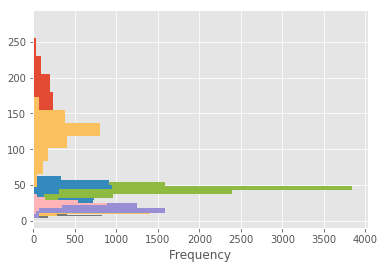

In [23]:
dates_survey.groupby('species')['weight'].plot.hist(orientation='horizontal')

### Bar Chart
(https://en.wikipedia.org/wiki/Bar_chart)

A bar chart or bar graph is a chart or graph that presents grouped data with rectangular bars with lengths proportional to the values that they represent.

Say we want to visualize the average weight of each species in a bar chart. First, we'll start by selecting that data from our original DataFrame:

In [38]:
avg_weight_by_species = dates_survey.groupby('species')['weight'].mean().sort_values()
avg_weight_by_species

species
flavus            7.955752
taylori           8.600000
montanus         10.250000
megalotis        10.583368
fulvescens       13.479452
penicillatus     17.187942
leucopus         18.971429
intermedius      19.428571
sp.              19.444444
maniculatus      21.341317
eremicus         21.576795
torridus         24.217203
leucogaster      31.328177
baileyi          31.739922
merriami         43.136013
ordii            48.867384
ochrognathus     55.375000
fulviventer      60.105263
hispidus         64.849057
spectabilis     120.226396
albigula        158.784689
Name: weight, dtype: float64

We'll create a bar chart in Pandas with our sorted data:

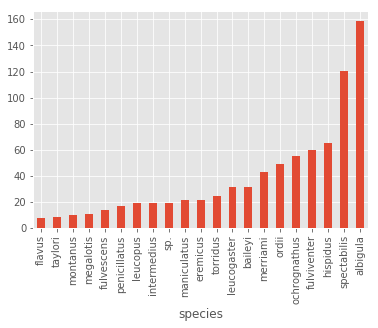

In [39]:
avg_weight_by_species.plot.bar()

### Scatter Plot
(https://en.wikipedia.org/wiki/Scatter_plot)

A scatter plot is a type of plot that uses Cartesian coordinates to display values for typically two variables in a set of data. If the points are color-coded, one additional variable can be displayed. The data is displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

We'll create a scatter plot in Pandas to visualize the relationship between hindfoot_length and weight for the "flavus" species. We'll also color the points dark blue. 

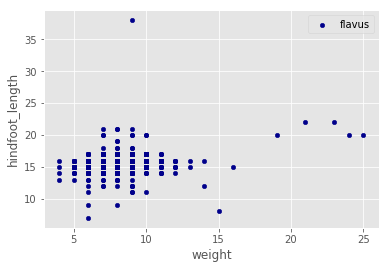

In [56]:
flavus_figure = dates_survey[(dates_survey['species'] == 'flavus')].plot.scatter(x='weight', y='hindfoot_length', color='DarkBlue', label='flavus')

We'll also create another similar scatter plot for the "flavus" species as well:

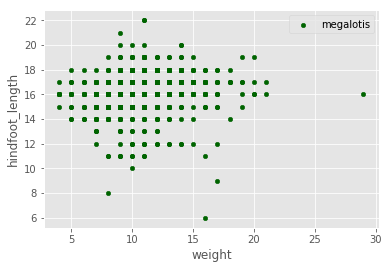

In [55]:
megalotis_figure = dates_survey[(dates_survey['species'] == 'megalotis')].plot.scatter(x='weight', y='hindfoot_length', color='DarkGreen', label='megalotis')

You can also create scatter plots with multiple sets of points that are color coded, as mentioned in the definition above. We'll create another scatter plot that contains our original points in blue, but also the same measures for the species "megalotis" in green:

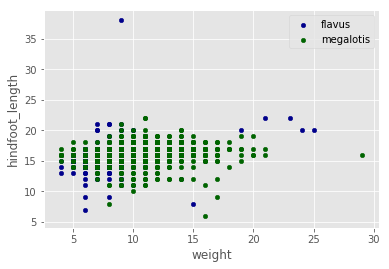

In [52]:
flavus_figure = dates_survey[(dates_survey['species'] == 'flavus')].plot.scatter(x='weight', y='hindfoot_length', color='DarkBlue', label='flavus')
megalotis_figure = dates_survey[(dates_survey['species'] == 'megalotis')].plot.scatter(x='weight', y='hindfoot_length', color='DarkGreen', label='megalotis', ax=flavus_figure)

### Using ggplot for visualizations

Making plots is a very repetitive: draw this line, add these colored points, then add these, etc. Instead of re-using the same code over and over, ggplot implements them using a high-level but very expressive API. The result is less time spent creating your charts, and more time interpreting what they mean.

ggplot is not a good fit for people trying to make highly customized data visualizations. While you can make some very intricate, great looking plots, ggplot sacrifices highly customization in favor of general doing "what you'd expect".

#### Data

ggplot can use Pandas DataFrames as input for creating visualizations, and integrates seamlessly with Pandas.

#### Aesthetics (aes)

Aesthetics describe how your data will relate to your plots. Some common aesthetics are: x, y, and color. Aesthetics are specific to the type of plot (or layer) you're adding to your visual. For example, a scatterplot (geom_point) and a line (geom_line) will share x and y, but only a line chart has a linetype aesthetic.

#### Layers

ggplot lets you combine or add different types of visualization components (or layers) together. This is done by concatenating the different components together. You will typically start by defining the data and aesthetics (x and y axes, etc) in a "ggplot" object, and then concatenating additional layers, including the type of visualization, facets, etc. This is done using Python concatenation very similarly to how you'd concatenate multiple strings (+). 

### Box Plots
(from: http://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/)

The box-and-whisker plot is an exploratory graphic, created by John W. Tukey, used to show the distribution of a dataset (at a glance). Think of the type of data you might use a histogram with, and the box-and-whisker (or box plot, for short) could probably be useful.

#### Reading a Box-and-Whisker Plot
Let’s say we ask 2,852 people how many hamburgers they’ve consumed in the past week. We’ll sort those responses from least to greatest and then graph them with our box-and-whisker.

Take the top 50% of the group (1,426) who ate more hamburgers; they are represented by everything above the median (the white line). Those in the top 25% of hamburger eating (713) are shown by the top “whisker” and dots. Dots represent those who ate a lot more than normal or a lot less than normal (outliers). If more than one outlier ate the same number of hamburgers, dots are placed side by side.

#### Find Skews in the Data
The box-and-whisker shows you more than just four split groups. You can also see which way the data sways. For example, if there are more people who eat a lot of burgers than eat a few, the median is going to be higher or the top whisker could be longer than the bottom one. Basically, it gives you a good overview of the data’s distribution.

<img src="http://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif?w=1090"/>

We'll use ggplot to create a box plot of distribution of hindfoot length by species:

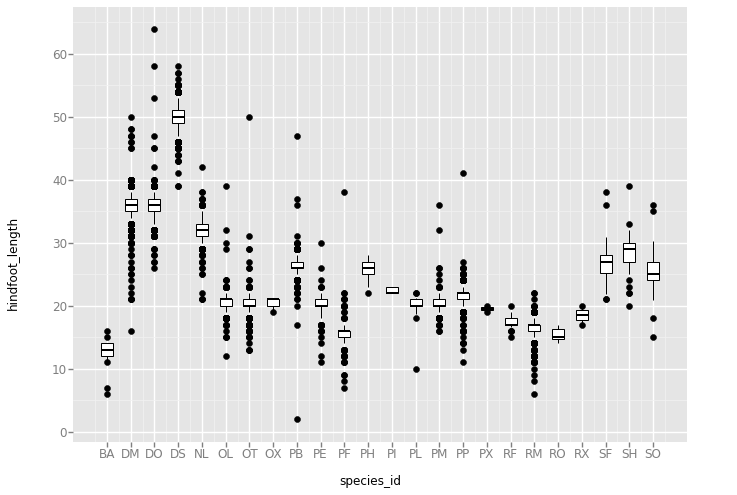

<ggplot: (-9223372036569519528)>

In [25]:
ggplot(aes(x='species_id', y='hindfoot_length'), data=dates_survey) + geom_boxplot()

### Line Chart (faceted)
https://github.com/yhat/ggpy/blob/master/docs/how-to/Building%20Faceted%20(or%20Trellised)%20Plots.ipynb
http://ggplot.yhathq.com/docs/geom_density.html

Line charts (called density plots in ggplot) are easy to create. You can also create "small multiples" using ggplot's "facet_wrap()" method. Note that in the following example, we separate out the call to create the visualizaton over multiple lines, which is why we end each line with a "\".

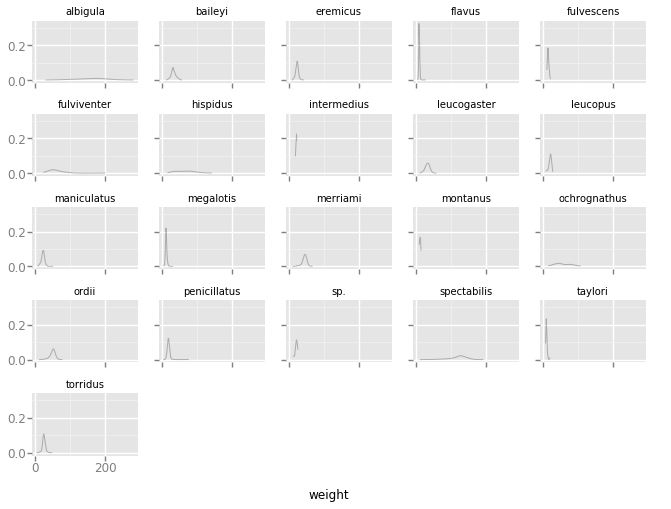

<ggplot: (285653908)>

In [26]:
ggplot(dates_survey, aes(x='weight', fill='hindfoot_length')) +\
    geom_density(alpha=0.25) +\
    facet_wrap('species')

### Histogram with Faceting

We'll create another histogram, this time with ggplot and we'll also apply the faceting that we saw in the last example. We'll look at the distribution of weights, but this time for each different genus type. We'll also change the theme - ggplot comes with several different themes which change the look and feel of the resulting visualization. For more information about themes, check the "Themes" section on the ggplot documetation page (http://ggplot.yhathq.com/docs/index.html)


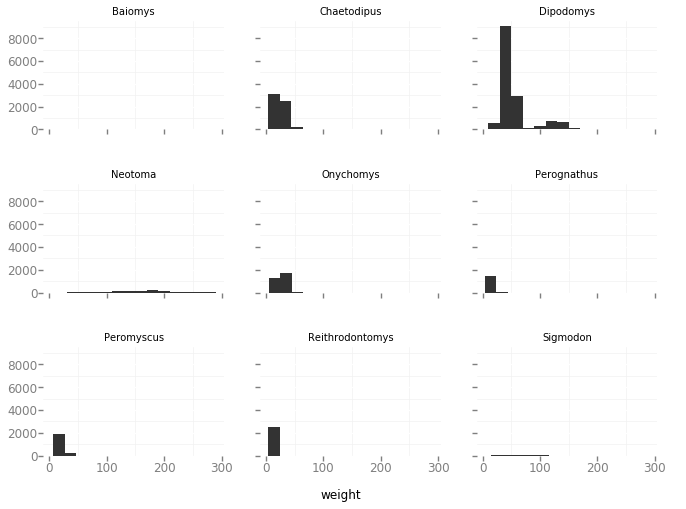

<ggplot: (286781795)>

In [27]:
ggplot(aes(x='weight'), data=dates_survey) + \
    geom_histogram(binwidth=20) + \
    facet_wrap("genus") + \
    theme_bw()

## Workshop 2 Challenges

Next, we'll move on to the workshop_2_challenges.ipynb notebook, where you'll apply what you've learned in this notebook to a different dataset!